In [10]:
#import libraries 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras.utils as image  
import os
import matplotlib.pyplot as plt
from os import listdir

# First approach build your own CNN

In [3]:
base_dir = './apod-dataset/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

train_fake_dir = os.path.join(train_dir, 'fake')
train_real_dir = os.path.join(train_dir, 'real')

validation_fake_dir = os.path.join(validation_dir, 'fake')
validation_real_dir = os.path.join(validation_dir, 'real')

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 17, 17, 64)      

In [38]:
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [39]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode='binary',
                                                         target_size=(150, 150))

Found 1405 images belonging to 2 classes.
Found 1787 images belonging to 2 classes.


In [41]:
history = model.fit(
            train_generator, 
            steps_per_epoch=50,
            epochs=20,
            validation_data=validation_generator, 
            validation_steps=50,
            verbose=2
            )

Epoch 1/20
50/50 - 9s - loss: 0.4639 - accuracy: 0.7848 - val_loss: 0.4513 - val_accuracy: 0.7980 - 9s/epoch - 187ms/step
Epoch 2/20
50/50 - 8s - loss: 0.4557 - accuracy: 0.7878 - val_loss: 0.4541 - val_accuracy: 0.7860 - 8s/epoch - 157ms/step
Epoch 3/20
50/50 - 7s - loss: 0.4553 - accuracy: 0.7919 - val_loss: 0.4331 - val_accuracy: 0.7900 - 7s/epoch - 142ms/step
Epoch 4/20
50/50 - 7s - loss: 0.4572 - accuracy: 0.7980 - val_loss: 0.6031 - val_accuracy: 0.6690 - 7s/epoch - 141ms/step
Epoch 5/20
50/50 - 7s - loss: 0.4484 - accuracy: 0.8000 - val_loss: 0.4691 - val_accuracy: 0.7740 - 7s/epoch - 136ms/step
Epoch 6/20
50/50 - 7s - loss: 0.3923 - accuracy: 0.8325 - val_loss: 0.4543 - val_accuracy: 0.7860 - 7s/epoch - 136ms/step
Epoch 7/20
50/50 - 7s - loss: 0.3835 - accuracy: 0.8355 - val_loss: 0.4515 - val_accuracy: 0.8030 - 7s/epoch - 139ms/step
Epoch 8/20
50/50 - 7s - loss: 0.3613 - accuracy: 0.8477 - val_loss: 0.4254 - val_accuracy: 0.8260 - 7s/epoch - 134ms/step
Epoch 9/20
50/50 - 7s - 

Text(0.5, 1.0, 'Loss in training and validation')

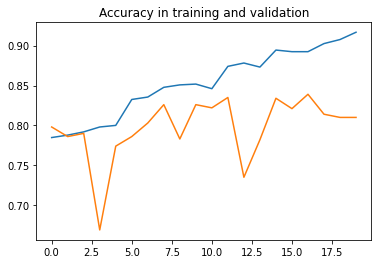

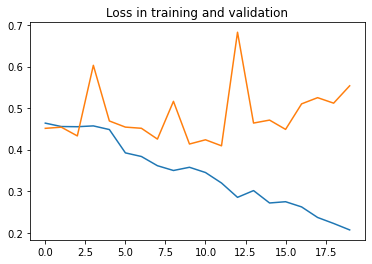

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) 

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Accuracy in training and validation')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Loss in training and validation')

In [43]:
folder_dir = "./apod-dataset/valid/real/"
a=0
for images in os.listdir(folder_dir):
    a=a+1

    if (images.endswith(".jpg")or images.endswith(".png")):
        img = image.load_img(folder_dir+images, target_size=(150, 150)) 

          # scaling process
        x = image.img_to_array(img)
        x /= 255 
        x = np.expand_dims(x, axis=0)
          # flatten the output
        images = np.vstack([x])

          # prediction!
        classes = model.predict(images, batch_size=10)

        print(classes[0])

        if classes[0] > 0.5:
            print(" is a real!")
        else:
            print(" is a fake!")
    if a==10:
        break

1/1 [==============================] - 1s 518ms/step
[0.9999969]
 is a real!
1/1 [==============================] - 0s 95ms/step
[1.]
 is a real!
1/1 [==============================] - 0s 87ms/step
[0.9999884]
 is a real!
1/1 [==============================] - 0s 85ms/step
[1.]
 is a real!
1/1 [==============================] - 0s 83ms/step
[0.98434055]
 is a real!
1/1 [==============================] - 0s 113ms/step
[0.9997886]
 is a real!
1/1 [==============================] - 0s 107ms/step
[1.]
 is a real!
1/1 [==============================] - 0s 88ms/step
[0.9999196]
 is a real!
1/1 [==============================] - 0s 105ms/step
[1.]
 is a real!
1/1 [==============================] - 0s 118ms/step
[0.6611284]
 is a real!


# Fine tune the keras build in model

In [46]:
import tensorflow as tf

In [44]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [51]:
base_model = InceptionV3(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = tf.keras.Input(shape=(150, 150, 3))
  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(inputs)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = tf.keras.layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 2049      
                                                           

In [54]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

epochs = 15
history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/15
71/71 [==============================] - 96s 1s/step - loss: 0.6449 - binary_accuracy: 0.5708 - val_loss: 0.6570 - val_binary_accuracy: 0.4415
Epoch 2/15
71/71 [==============================] - 83s 1s/step - loss: 0.6259 - binary_accuracy: 0.5815 - val_loss: 0.6334 - val_binary_accuracy: 0.4801
Epoch 3/15
71/71 [==============================] - 77s 1s/step - loss: 0.6145 - binary_accuracy: 0.5929 - val_loss: 0.6002 - val_binary_accuracy: 0.5490
Epoch 4/15
71/71 [==============================] - 83s 1s/step - loss: 0.6068 - binary_accuracy: 0.6135 - val_loss: 0.6036 - val_binary_accuracy: 0.5422
Epoch 5/15
71/71 [==============================] - 83s 1s/step - loss: 0.5989 - binary_accuracy: 0.6192 - val_loss: 0.6102 - val_binary_accuracy: 0.5339
Epoch 6/15
71/71 [==============================] - 84s 1s/step - loss: 0.5890 - binary_accuracy: 0.6256 - val_loss: 0.6042 - val_binary_accuracy: 0.5439
Epoch 7/15
71/71 [==============================] - 76s 1s/step - loss: 0.58

In [57]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

epochs = 10
history=model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 2049      
                                                           

In [58]:
folder_dir = "./apod-dataset/valid/real/"
a=0
for images in os.listdir(folder_dir):
    a=a+1

    if (images.endswith(".jpg")or images.endswith(".png")):
        img = image.load_img(folder_dir+images, target_size=(150, 150)) 

          # scaling process
        x = image.img_to_array(img)
        x /= 255 
        x = np.expand_dims(x, axis=0)
          # flatten the output
        images = np.vstack([x])

          # prediction!
        classes = model.predict(images, batch_size=10)

        print(classes[0])

        if classes[0] > 0.5:
            print(" is a real!")
        else:
            print(" is a fake!")
    if a==10:
        break

1/1 [==============================] - 3s 3s/step
[3.3006082]
 is a real!
1/1 [==============================] - 0s 77ms/step
[7.4722385]
 is a real!
1/1 [==============================] - 0s 74ms/step
[8.534357]
 is a real!
1/1 [==============================] - 0s 75ms/step
[4.21603]
 is a real!
1/1 [==============================] - 0s 80ms/step
[0.02768583]
 is a fake!
1/1 [==============================] - 0s 80ms/step
[4.213667]
 is a real!
1/1 [==============================] - 0s 76ms/step
[7.3440514]
 is a real!
1/1 [==============================] - 0s 100ms/step
[2.9008718]
 is a real!
1/1 [==============================] - 0s 75ms/step
[3.730159]
 is a real!
1/1 [==============================] - 0s 74ms/step
[-0.8955549]
 is a fake!
